# <font color="red"><b><I>Salary estimation using K-NEAREST NEIGHBOUR</b></font>
<b>NAKKA SHEKHAR</b>
* linked in: https://www.linkedin.com/in/nakka-shekhar-2019a987/
* github : https://github.com/shekhar443/MACHINE-LEARNING-PROJECT

Steps followed by :

* Import required Libraries
* Loading Dataset/Injecting Dataset
* Basic Data Inspection
* Statistical Inspection
* Checking null values
* Replacing {'<=50K':0, '>50K':1}
* Segregate Data Into X(independent) and Y(dependent) variables
* Splitting Dataset Into train and test
* Feature Scaling
* Finding Best K values
* Prediction of new customer data
* Predict for all test data
* Model evaluation Confusion Matrix

### Import required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Loading Dataset/Injecting Dataset

In [2]:
df=pd.read_csv("ML/salary.csv")

### Basic Data Inspection
* df.head()
* df.tail()
* df.dtypes
* df.income.unique()
* df.columns
* df.shape
* df.size

In [3]:
df.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [4]:
df.tail()

,age,education.num,capital.gain,hours.per.week,income
32556,22,10,0,40,<=50K
32557,27,12,0,38,<=50K
32558,40,9,0,40,>50K
32559,58,9,0,40,<=50K
32560,22,9,0,20,<=50K


In [5]:
df.dtypes

age                int64
education.num      int64
capital.gain       int64
hours.per.week     int64
income            object
dtype: object

In [6]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

#### here the target variable is income which is object datatype with ['<=50K', '>50K'] unique
#### this should be changed to int datatype with '<=50K' as 0, '>50K' as 1

In [7]:
print("the list of columns present in the dataset are ",list(df.columns))

the list of columns present in the dataset are  ['age', 'education.num', 'capital.gain', 'hours.per.week', 'income']


In [8]:
r,c=df.shape
print("the shape consist of rows {0} and columns {1} ".format(r,c))

the shape consist of rows 32561 and columns 5 


In [9]:
print("the size of dataset is {}".format(df.size))

the size of dataset is 162805


### Statistical Inspection

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education.num   32561 non-null  int64 
 2   capital.gain    32561 non-null  int64 
 3   hours.per.week  32561 non-null  int64 
 4   income          32561 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [11]:
df.describe()

,age,education.num,capital.gain,hours.per.week
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,40.437456
std,13.640433,2.572720,7385.292085,12.347429
min,17.000000,1.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,99.000000


### Checking null values

In [12]:
df.isnull().sum()

age               0
education.num     0
capital.gain      0
hours.per.week    0
income            0
dtype: int64

#### so no null value is present

### Replacing {'<=50K':0, '>50K':1}

In [13]:
df["income"]=df["income"].map({'<=50K':0, '>50K':1}).astype(int)

In [14]:
df["income"].unique()

array([0, 1])

In [15]:
df.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0


#### Rename the columns

In [16]:
df.rename(columns={"education.num":"education","capital.gain":"capital_gain","hours.per.week":"hours_per_week"},inplace=True)

#### income feature converted into 0 and 1

### Segregate Data Into X(independent) and Y(dependent) variables

In [17]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [18]:
X.shape

(32561, 4)

In [19]:
y.shape

(32561,)

### Splitting Dataset Into train and test

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)

### Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [22]:
X_train

array([[ 1.50127972, -0.41667267, -0.14739068, -0.03650533],
       [ 0.10500219, -0.02696962, -0.14739068, -0.03650533],
       [-0.8503456 , -0.41667267, -0.14739068, -0.03650533],
       ...,
       [-0.92383389, -0.02696962, -0.14739068,  0.125387  ],
       [-0.77685731, -2.75489095, -0.14739068, -0.03650533],
       [ 0.10500219, -0.41667267, -0.14739068,  0.61106397]])

In [23]:
X_test

array([[ 0.10500219, -0.41667267, -0.14739068,  1.58241791],
       [-0.18895098,  1.14213952, -0.14739068, -0.03650533],
       [-0.8503456 , -0.41667267, -0.14739068, -0.03650533],
       ...,
       [-0.92383389,  1.14213952, -0.14739068, -0.03650533],
       [ 1.79523289, -0.02696962, -0.14739068,  1.58241791],
       [-0.8503456 , -1.19607876, -0.14739068,  0.77295629]])

### Finding Best K value

Text(0, 0.5, 'Mean Error')

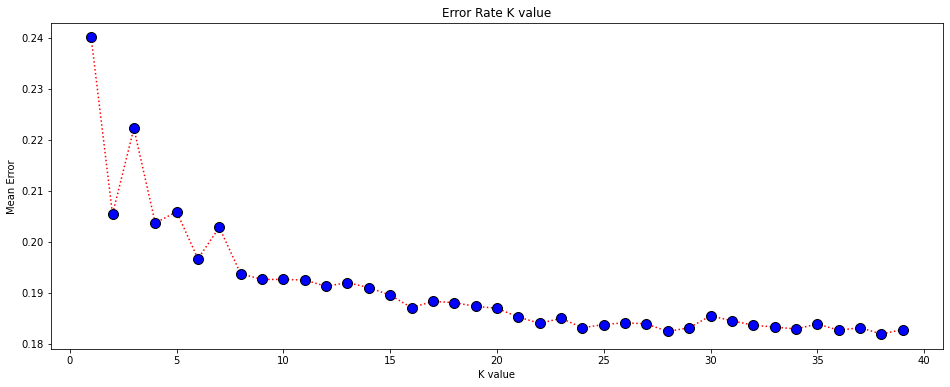

In [24]:
from sklearn.neighbors import KNeighborsClassifier
error=[]
for i in range(1,40):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    error.append(np.mean(y_pred != y_test))
plt.figure(figsize=(16,6))
plt.plot(range(1,40),error,color="r",linestyle="dotted",marker="o",
         markerfacecolor="b",markeredgecolor='k',markersize=10)
plt.title("Error Rate K value")
plt.xlabel("K value")
plt.ylabel("Mean Error")

#### the best k value choosen is k=16 where the mean error is very less

### Model building with best K value

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=16,metric="minkowski",p=2)
knc.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=16)

### Prediction of new customer data

In [26]:
Age=int(input("enter the age between 17 and 90"))
Education=int(input("enter education number between 1 and 16"))
Capital_gain=int(input("enter capital_gain between 0 and 99999 "))
Hours_per_week=int(input("enter the hours_per_week between 1 and 99 "))
newEmp=[[Age,Education,Capital_gain,Hours_per_week]]
result=knc.predict(ss.fit_transform(newEmp))
print(result)
if result==1:
    print("Emp Might got salary above 50k ")
else:
    print("Emp Might not got salary above 50k")

enter the age between 17 and 9060
enter education number between 1 and 1616
enter capital_gain between 0 and 99999 55555
enter the hours_per_week between 1 and 99 80
[0]
Emp Might not got salary above 50k


### Predict for all test data

In [27]:
y_pred=knc.predict(X_test)

In [28]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Model evaluation Confusion Matrix

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cm)
print(" ")
print("accuracy score is :",(accuracy_score(y_test,y_pred)*100).round(2),"%")

Confusion Matrix:
[[5835  332]
 [1191  783]]
 
accuracy score is : 81.29 %


In [30]:
knc.classes_

array([0, 1])

In [31]:
knc.effective_metric_

'euclidean'

In [32]:
knc.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(n_neighbors=16)>

In [33]:
knc.n_features_in_

4

In [34]:
knc.leaf_size

30